

*   Module Id: SWE6206
*   Assessment Title: Emerging Technologies Emerging Technologies based
Industry Solutions
*   Student Id: 2417160








In [ ]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
PATH = '/content/drive/MyDrive/EmergingTech/Crop Recommendation Model/Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.dtypes


,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


In [ ]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   Maximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")

In [ ]:
for i in df['label'].unique():
    print('Detect Outlier for crop:',i,'(in Nutrient N)')
    detect_outlier(df['P'][df['label']==i])
    print('---------------------------------------------')

Detect Outlier for crop: rice (in Nutrient N)
Lower limit: 21.125 Upper limit: 74.125
Minimum value: 35   Maximum Value: 60
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: maize (in Nutrient N)
Lower limit: 22.875 Upper limit: 75.875
Minimum value: 35   Maximum Value: 60
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: chickpea (in Nutrient N)
Lower limit: 41.5 Upper limit: 93.5
Minimum value: 55   Maximum Value: 80
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Detect Outlier for crop: kidneybeans (in Nutrient N)
Lower limit: 41.5 Upper limit: 93.5
Minimum value: 55   Maximum Value: 80
Lower limit passed - No need to remove outlier
Upper limit passed - No need to r

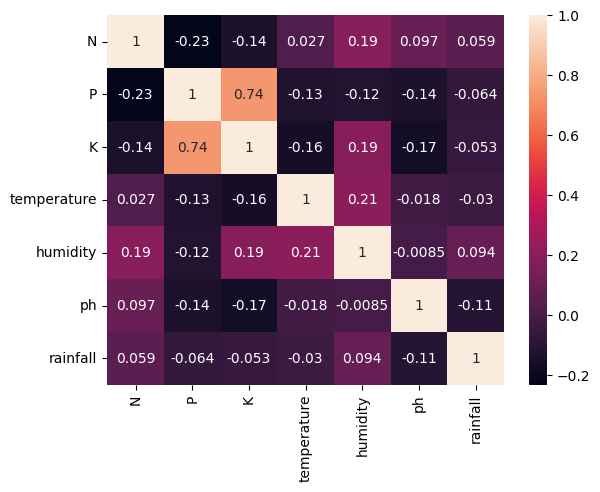

In [ ]:
sns.heatmap(df.drop('label', axis=1).corr(), annot=True)
#Save Heatmap as image
plt.savefig('Heatmap.png')

#Not much relation ship with each other.

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [ ]:
RF.save('model.h5')

AttributeError: 'RandomForestClassifier' object has no attribute 'save'

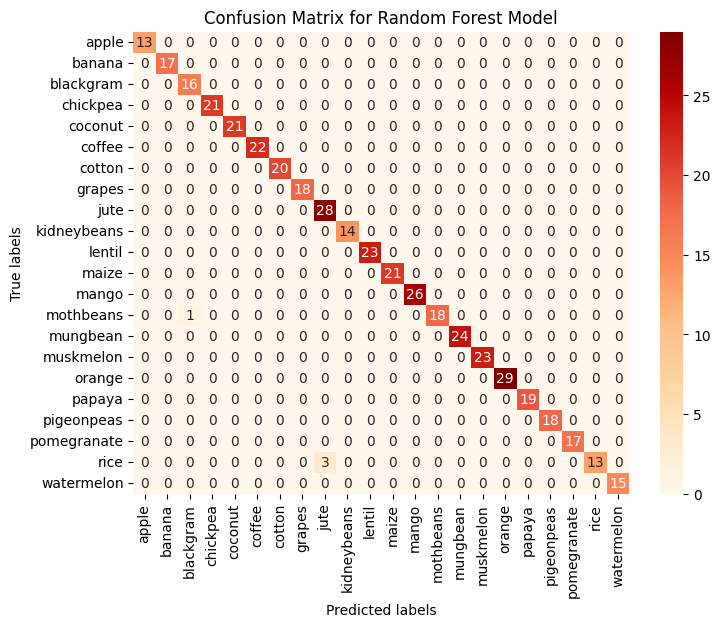

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Ytest, predicted_values)

# Plot confusion matrix
#plt.figure(figsize=[10,5],dpi = 100)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="OrRd", fmt="d", xticklabels=np.unique(Ytest), yticklabels=np.unique(Ytest))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.savefig('Confusion_Matrix_RandomForest.png')
plt.show()

In [ ]:
import pickle

# Save the trained model to a file
filename = 'crop_recommendation_model.sav'
pickle.dump(RF, open(filename, 'wb'))

In [ ]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [ ]:
import pandas as pd
import numpy as np
import pickle

# Load the trained Random Forest model
RF_pkl_filename = 'RandomForest.pkl'
with open(RF_pkl_filename, 'rb') as RF_Model_pkl:
    RF = pickle.load(RF_Model_pkl)

def recommend_crops(temperature, humidity):
    # Create a DataFrame with the input parameters
    input_data = pd.DataFrame([[np.nan, np.nan, np.nan, temperature, humidity, np.nan, np.nan]],
                             columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

    # Get probabilities for all crops
    probabilities = RF.predict_proba(input_data)[0]

    # Get indices of top 3 probabilities
    top_indices = np.argsort(probabilities)[-3:][::-1]

    # Get corresponding crop labels
    crop_labels = RF.classes_[top_indices]

    return crop_labels.tolist()

# Example usage
temperature = 50
humidity = 60
recommendations = recommend_crops(temperature, humidity)
print(f"The 3 best crops for temperature {temperature}°C and humidity {humidity}% are: {recommendations}")

The 3 best crops for temperature 50°C and humidity 60% are: ['mango', 'blackgram', 'lentil']
